In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

spring_SS = pd.read_csv('spring_turb_SS_data.csv', index_col=0, parse_dates=True)
summer_SS = pd.read_csv('summer_turb_SS_data.csv', index_col=0, parse_dates=True)
discharge = pd.read_csv('discharge_2023.csv', index_col=0, parse_dates=True)
shear_stress = pd.read_csv('mobile_shear_stress_2023.csv', index_col=0, parse_dates=True)
spring_clean_turb = pd.read_csv('SP23_clean_complete.csv', index_col=0, parse_dates=True)
summer_clean_turb = pd.read_csv('SM23_clean_complete.csv', index_col=0, parse_dates=True)


In [54]:
# in the turbidity data, get rid of the negative values
spring_clean_turb[spring_clean_turb < 0] = np.nan
summer_clean_turb[summer_clean_turb < 0] = np.nan

# resample the date frames so they have 1-min intervals instead of 15-min intervals
spring_SS = spring_SS.resample('1T').mean().interpolate()
summer_SS = summer_SS.resample('1T').mean().interpolate()
discharge = discharge.resample('1T').mean().interpolate()
shear_stress = shear_stress.resample('1T').mean().interpolate()
spring_clean_turb = spring_clean_turb.resample('1T').mean().interpolate()
summer_clean_turb = summer_clean_turb.resample('1T').mean().interpolate()

# merge the discharge and shear stresses as new columns by date
spring_SS = spring_SS.merge(discharge, on='Date_Time')
spring_SS = spring_SS.merge(shear_stress, on='Date_Time')
spring_SS = spring_SS.merge(spring_clean_turb, on='Date_Time')
summer_SS = summer_SS.merge(discharge, on='Date_Time')
summer_SS = summer_SS.merge(shear_stress, on='Date_Time')
summer_SS = summer_SS.merge(summer_clean_turb, on='Date_Time')

### Plotting Time Series

#### Without cleaning turbidity record 

Spring 

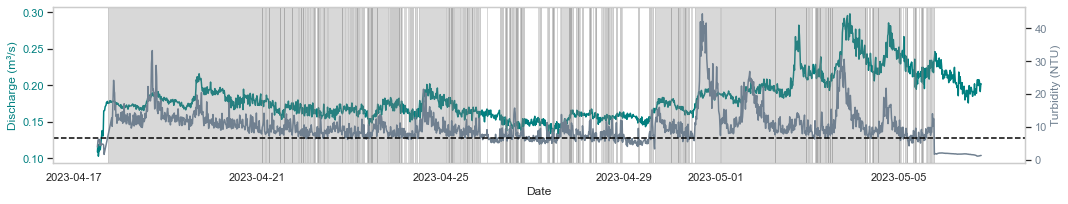

In [64]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(15, 3))

# discharge on the left y-axis
color = 'teal'
sns.lineplot(x=spring_SS.index, y=spring_SS['Q'], ax=ax1, color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (m³/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin axis for suspended sediment
ax2 = ax1.twinx()
color = 'slategray'
sns.lineplot(x=spring_SS.index, y=spring_SS['Turbidity (NTU)'], ax=ax2, color=color)
ax2.set_ylabel('Turbidity (NTU)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# add a dashed line for the threshold of suspended sediment
ax2.axhline(y=6.5, color='black', linestyle='--')

# highlight areas where turbidity exceeds the threshold
threshold = 7.8
exceeding = spring_SS['Turbidity (NTU)'] > threshold

# identify start and end of each exceedance period
in_exceedance = False
start = None

for i in range(len(spring_SS)):
    if exceeding.iloc[i] and not in_exceedance:
        start = spring_SS.index[i]
        in_exceedance = True
    elif not exceeding.iloc[i] and in_exceedance:
        ax2.axvspan(start, spring_SS.index[i], color='grey', alpha=0.3)
        in_exceedance = False

# close any open exceedance window
if in_exceedance:
    ax2.axvspan(start, spring_SS.index[-1], color='grey', alpha=0.3)

fig.tight_layout()
plt.show()

Summer

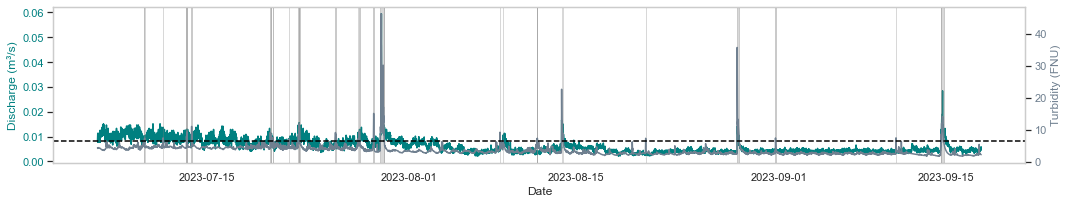

In [59]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(15, 3))

# discharge on the left y-axis
color = 'teal'
sns.lineplot(x=summer_SS.index, y=summer_SS['Q'], ax=ax1, color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (m³/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin axis for suspended sediment
ax2 = ax1.twinx()
color = 'slategray'
sns.lineplot(x=summer_SS.index, y=summer_SS['Turbidity (NTU)'], ax=ax2, color=color)
ax2.set_ylabel('Turbidity (FNU)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# add a dashed line for the threshold of suspended sediment
threshold = 6.5
ax2.axhline(y=threshold, color='black', linestyle='--')

# highlight areas where turbidity exceeds the threshold
exceeding = summer_SS['Turbidity (NTU)'] > threshold

# identify start and end of each exceedance period
in_exceedance = False
start = None

for i in range(len(summer_SS)):
    if exceeding.iloc[i] and not in_exceedance:
        start = summer_SS.index[i]
        in_exceedance = True
    elif not exceeding.iloc[i] and in_exceedance:
        ax2.axvspan(start, summer_SS.index[i], color='grey', alpha=0.3)
        in_exceedance = False

# close any open exceedance window
if in_exceedance:
    ax2.axvspan(start, summer_SS.index[-1], color='grey', alpha=0.3)

fig.tight_layout()
plt.show()


#### Clean turbidity record

Spring

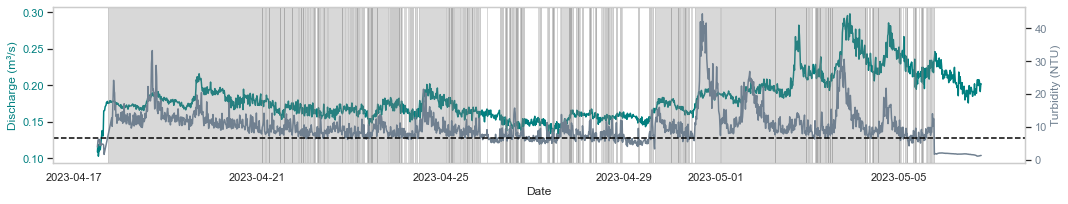

In [63]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(15, 3))

# discharge on the left y-axis
color = 'teal'
sns.lineplot(x=spring_SS.index, y=spring_SS['Q'], ax=ax1, color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (m³/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin axis for suspended sediment
ax2 = ax1.twinx()
color = 'slategray'
sns.lineplot(x=spring_SS.index, y=spring_SS['TurbClean'], ax=ax2, color=color)
ax2.set_ylabel('Turbidity (NTU)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# add a dashed line for the threshold of suspended sediment
ax2.axhline(y=6.5, color='black', linestyle='--')

# highlight areas where turbidity exceeds the threshold
threshold = 7.8
exceeding = spring_SS['TurbClean'] > threshold

# identify start and end of each exceedance period
in_exceedance = False
start = None

for i in range(len(spring_SS)):
    if exceeding.iloc[i] and not in_exceedance:
        start = spring_SS.index[i]
        in_exceedance = True
    elif not exceeding.iloc[i] and in_exceedance:
        ax2.axvspan(start, spring_SS.index[i], color='grey', alpha=0.3)
        in_exceedance = False

# close any open exceedance window
if in_exceedance:
    ax2.axvspan(start, spring_SS.index[-1], color='grey', alpha=0.3)

fig.tight_layout()
plt.show()

Summer

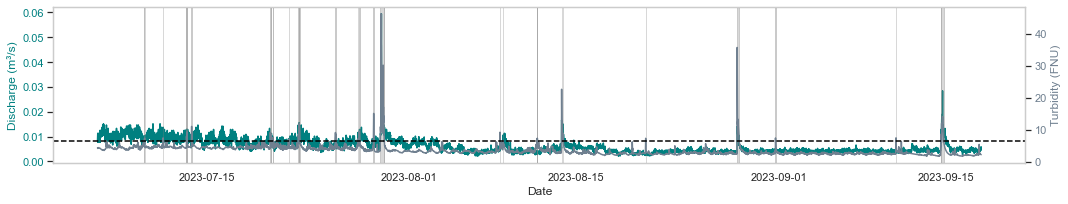

In [62]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(15, 3))

# discharge on the left y-axis
color = 'teal'
sns.lineplot(x=summer_SS.index, y=summer_SS['Q'], ax=ax1, color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (m³/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin axis for suspended sediment
ax2 = ax1.twinx()
color = 'slategray'
sns.lineplot(x=summer_SS.index, y=summer_SS['TurbClean'], ax=ax2, color=color)
ax2.set_ylabel('Turbidity (FNU)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# add a dashed line for the threshold of suspended sediment
threshold = 6.5
ax2.axhline(y=threshold, color='black', linestyle='--')

# highlight areas where turbidity exceeds the threshold
exceeding = summer_SS['TurbClean'] > threshold

# identify start and end of each exceedance period
in_exceedance = False
start = None

for i in range(len(summer_SS)):
    if exceeding.iloc[i] and not in_exceedance:
        start = summer_SS.index[i]
        in_exceedance = True
    elif not exceeding.iloc[i] and in_exceedance:
        ax2.axvspan(start, summer_SS.index[i], color='grey', alpha=0.3)
        in_exceedance = False

# close any open exceedance window
if in_exceedance:
    ax2.axvspan(start, summer_SS.index[-1], color='grey', alpha=0.3)

fig.tight_layout()
plt.show()

### Calculating Cumulative time in suspension

In [70]:
def calculate_suspension_time(df, threshold, season):
    # identify times when turbidity exceeds the threshold
    exceeding = df['Turbidity (NTU)'] > threshold
    
    # calculate total time in suspension
    total_time = (exceeding.sum()) * (df.index[1] - df.index[0])  # Assuming regular intervals
    
    print(f"Cumulative time sediment is in suspension for {season}: {total_time}")
    
# calculate for spring and summer
calculate_suspension_time(spring_SS, 7.8, "spring")
calculate_suspension_time(summer_SS, 6.5, "summer")

Cumulative time sediment is in suspension for spring: 13 days 05:37:00
Cumulative time sediment is in suspension for summer: 1 days 10:24:00


In [76]:
def calculate_suspension_time(df, threshold):
    exceeding = df['Turbidity (NTU)'] > threshold
    return exceeding.sum() * (df.index[1] - df.index[0]).total_seconds() / 3600  # Convert to hours

# Compute suspension times
spring_time = calculate_suspension_time(spring_SS, 7.8)
summer_time = calculate_suspension_time(summer_SS, 6.5)

# Compute ratio and percentage increase
ratio = spring_time / summer_time
percentage_increase = ((spring_time - summer_time) / summer_time) * 100

print(f"Spring suspension time: {spring_time:.2f} hours")
print(f"Summer suspension time: {summer_time:.2f} hours")
print(f"Spring lasted {ratio:.2f} times longer than summer")
print(f"Spring had a {percentage_increase:.2f}% longer suspension time than summer")


Spring suspension time: 317.62 hours
Summer suspension time: 34.40 hours
Spring lasted 9.23 times longer than summer
Spring had a 823.30% longer suspension time than summer
